In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Dell\AppData\Local\Temp\Rar$DIa16408.46231\train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [6]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [8]:
df=df.fillna(0)

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
df['Product_Category_2']=df['Product_Category_2'].astype(int)
df['Product_Category_3']=df['Product_Category_3'].astype(int)

In [11]:
df['Product_Category_2'].unique()

array([ 0,  6, 14,  2,  8, 15, 16, 11,  5,  3,  4, 12,  9, 10, 17, 13,  7,
       18])

In [12]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [13]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [14]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [15]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

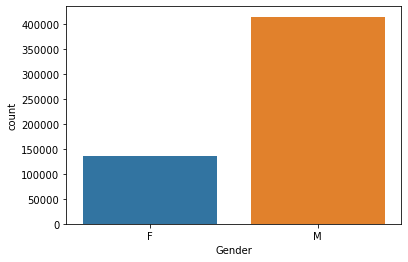

In [16]:
sns.countplot(df['Gender'])

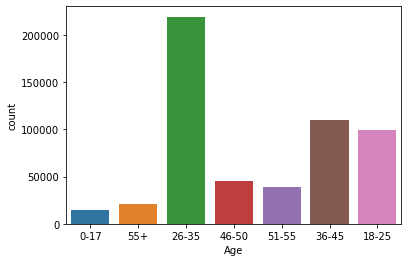

In [17]:
sns.countplot(df['Age'])

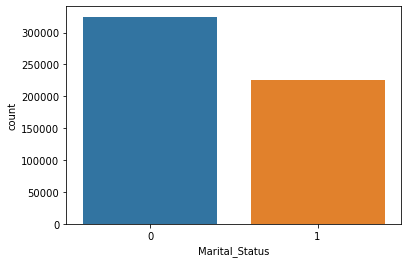

In [18]:
sns.countplot(df['Marital_Status'])

In [19]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

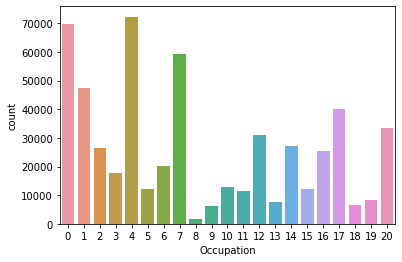

In [20]:
sns.countplot(df['Occupation'])

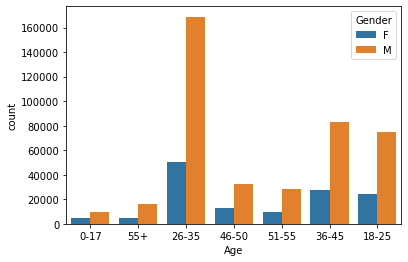

In [21]:
 sns.countplot(df['Age'],hue=df['Gender'])

In [22]:
df['combined_g_m']= df.apply(lambda x:'%s_%s' %(x['Gender'],x['Marital_Status']),axis=1)

In [23]:
df['combined_g_m'].unique()

array(['F_0', 'M_0', 'M_1', 'F_1'], dtype=object)

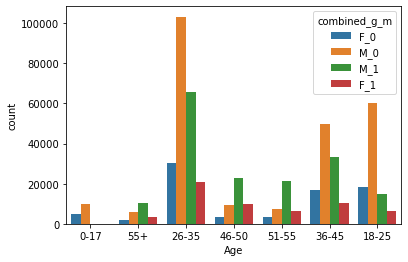

In [24]:
sns.countplot(df['Age'],hue=df['combined_g_m'])

In [25]:
df.Purchase.sum()

5095812742

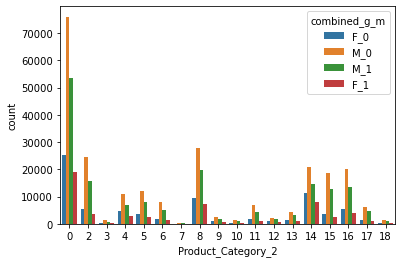

In [26]:
sns.countplot(df['Product_Category_2'],hue=df['combined_g_m'])

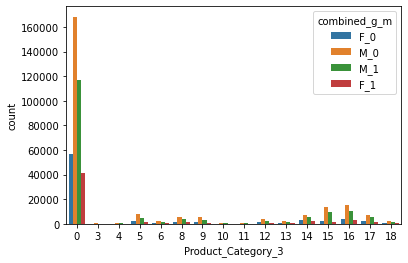

In [27]:
sns.countplot(df['Product_Category_3'],hue=df['combined_g_m'])

In [28]:
cols = ['User_ID','Product_ID']
df.drop(cols,inplace=True,axis=1)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 

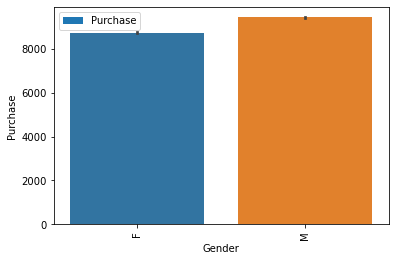

In [31]:
df[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender','Purchase',data=df)
plt.show()

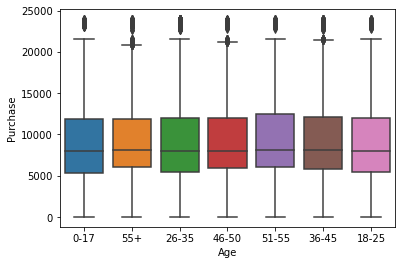

In [32]:
sns.boxplot('Age','Purchase',data=df)
plt.show()

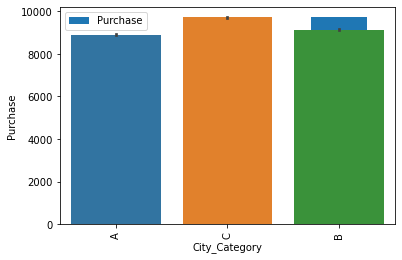

In [33]:
df[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category','Purchase',data=df)
plt.show()

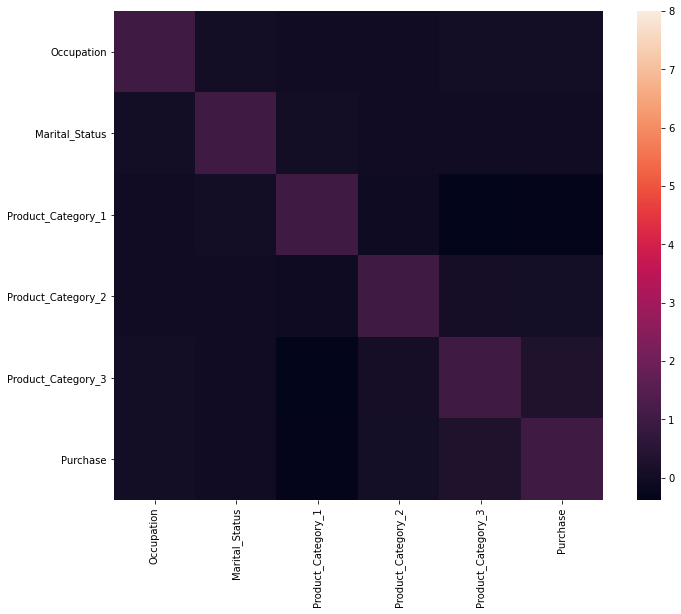

In [35]:
corrmat=df.corr()
fig,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=8,square=True)